# <span style="color:Orange">*Estudo analítico 👨🏽‍💻🧿🎲 📊 a respeito de percas dos materiais em processo (Scraps)*</span>
## <span style="color:yellow">**Foi usada uma base de dados fictício**</span> 🃏

In [1]:
#Importando bibliotecas necessarias
import pandas as pd #Manipulçao de dados
import numpy as np #Manipulçao de dados
import plotly.express as px #Geração de graficos
import plotly.graph_objects as go #Geração de graficos

#Bibliotecas para gerar Nuvem de palavras
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

### *Chamado do dataset original que é retirado diretamente do ERP, sem nem uma especie de tratamento*
### <span style="color:yellow">**Notem a bagunça que estão as informações, precisamos arrumar a casa!!!**</span>

In [14]:
#Chamando o dataset ORIGINAL.
df_mes = pd.read_csv("Report_Original.csv", sep = ',',encoding = "utf-8", on_bad_lines='skip')
df_mes.head()

,QRCode;Linha;OP;Produto;Descrição;Sintoma;Origem;Qtd.;Usuário_Solicitante;Dt.Solicitação;Usuário_Aprov/Reprov;Dt.Aprov/Reprov;Status
0,9407;GABINETE01;2310;200209030000350;PlasticsD...
1,9413;GABINETE01;2310;200209030000350;PlasticsD...
2,9415;GABINETE01;2310;200209030000350;PlasticsD...
3,9423;GABINETE01;2310;200209030000350;PlasticsD...
4,9424;GABINETE01;2310;2002090100N0009;GABINETE ...


## <span style="color:yellow">Vamos ao trabalho!!!</span> 🤖🕵🏽
### <span style="color:yellow">1️⃣</span> *Indentificação de valores unicos para renomear as linhas de forma correta* ✔️
### <span style="color:yellow">2️⃣</span> *Filtragem de coluna X valor e encontrar as linhas* ✔️
### <span style="color:yellow">3️⃣</span> *Renomeando valores, isso tera que ser feito em todas as colunas para que fique legivel e de facil entendimento* ✔️

In [ ]:
# Indentificar valores unicos para renomear as linhas de forma correta.
df_mes["Sintoma"].sort_values().unique()

#Filtragem coluna X valor e encontrar as linhas.
df_mes.loc[df_mes['Sintoma'] == 'COMPONENTE_SMD_DESLOCADO']

#Renomeando valores.
df_mes['Sintoma'] = df_mes['Sintoma'].str.replace('CORFORADOPADRďż˝O', 'COJ.FORA_DO_PADRÃO', regex= False)

## *Criando coluna <span style="color:yellow">Data.Aprovação</span> e <span style="color:yellow">Hora.Aprovação</span>_*
## *para facilitar posteriormente o filtro com data e hora.* 🧙🏽🧞

In [ ]:
# 1_Nova Data com Split das coluna "Name" separado por espaços
df_mes_new = df_mes["Dt.Aprov/Reprov"].str.split(" ", n = 1, expand = True)

# 2_Criando a Nova Coluna "First Name" com o new[0]
df_mes["Data.Aprovação"]= df_mes_new[0]
df_mes["Hora.Aprovação"]= df_mes_new[1]

# 3_Retirando a antiga coluna "Name" 
df_mes.drop(columns =["Dt.Aprov/Reprov"], inplace = True) 

## *Tratamentos e mais tratamentos : Colunas, rename, encoding etc etc etc...* 😮‍💨

In [ ]:
#Chamando o dataset e sem seguida removemendo colunas desnecessarias.
df_mes = pd.read_csv("Report_new.csv", sep = ',',encoding = "utf-8", on_bad_lines='skip')

# Removendo colunas indesejaveis e imprimindo
df_mes.drop(columns=['?','QRCode_'])

In [ ]:
# Ordenando as colunas e gerando um novo arquivo ja parametrizado.
df_mes_cl_ordenadas = df_mes[['QRCode', 'Linha', 'OP', 'Produto', 'Sintoma', 'Origem', 'Qtd.', 'Usuário_Solicitante', 'Data.Solicitação', 
                        'Hora.Solicitação', 'Usuário_Aprov/Reprov', 'Data.Aprovação', 'Hora.Aprovação', 'Status']]
df_mes.to_csv("Report_atual.csv")

## *Por fim, tudo tratado e parametrizado 💯% (Delicia)* 😁🤩

In [4]:
# Chamada de tratamentos de dados parametrizados.
df_mes = pd.read_csv("Report_atual.csv", sep = ',',encoding = "utf-8", on_bad_lines='skip')
df_mes

,QRCode,Linha,OP,Produto,Sintoma,Origem,Qtd.,Usuário_Solicitante,Data.Solicitação,Hora.Solicitação,Usuário_Aprov/Reprov,Data.Aprovação,Hora.Aprovação,Status
0,9407,Valley.OfBowser3,2310,200209030000350,VISOR_TRINCADO,Fornecedor,11.0,Homem.DeFerro,31/10/2022,16:28:37,Coronel.Robert,01/11/2022,07:31:47,Aprovado
1,9413,Valley.OfBowser3,2310,200209030000350,VISOR_FALHA_INJEÇÃO,Fornecedor,5.0,Homem.DeFerro,31/10/2022,16:33:03,Coronel.Robert,01/11/2022,07:31:50,Aprovado
2,9415,Valley.OfBowser3,2310,200209030000350,VISOR_COM_MANCHA,Fornecedor,1.0,Homem.DeFerro,31/10/2022,16:34:26,Coronel.Robert,01/11/2022,07:32:03,Aprovado
3,9423,Valley.OfBowser3,2310,200209030000350,VISOR_COM_RISCO,Fornecedor,4.0,Homem.DeFerro,31/10/2022,16:41:24,Coronel.Robert,01/11/2022,07:32:05,Aprovado
4,9424,Valley.OfBowser3,2310,2002090100N0009,GABINETE_DANIFICADO,Fornecedor,1.0,Homem.DeFerro,31/10/2022,16:42:36,Coronel.Robert,01/11/2022,07:32:07,Aprovado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,9878,Tomb.Pit,2297,300100160000133,COMPONENTE_SMD_ALTERADO,Xi.Jinping,3.0,Princesa.Leia,04/11/2022,15:35:55,Kerri.Green,04/11/2022,15:42:08,Aprovado
233,9879,Tomb.Pit,2297,502200000000007,COMPONENTE_SMD_ALTERADO,Xi.Jinping,5.0,Princesa.Leia,04/11/2022,15:36:29,Kerri.Green,04/11/2022,15:42:12,Aprovado
234,9880,Tomb.Pit,2297,301001000000009,COMPONENTE_SMD_DANIFICADO,Xi.Jinping,1.0,Princesa.Leia,04/11/2022,15:38:23,Kerri.Green,04/11/2022,15:42:04,Aprovado
235,9882,Tomb.Pit,2297,200209040000079,COMPONENTE_SMD_DANIFICADO,Estrela.DaMorte,4.0,Princesa.Leia,04/11/2022,15:40:13,Kerri.Green,04/11/2022,15:42:23,Aprovado


# *Vamos agora as visualizações, e disso q o povo gosta!* 🎉🕺

### <span style="color:GreenYellow">*Linhas de produção com maiores incidências de scraps*</span> 📊

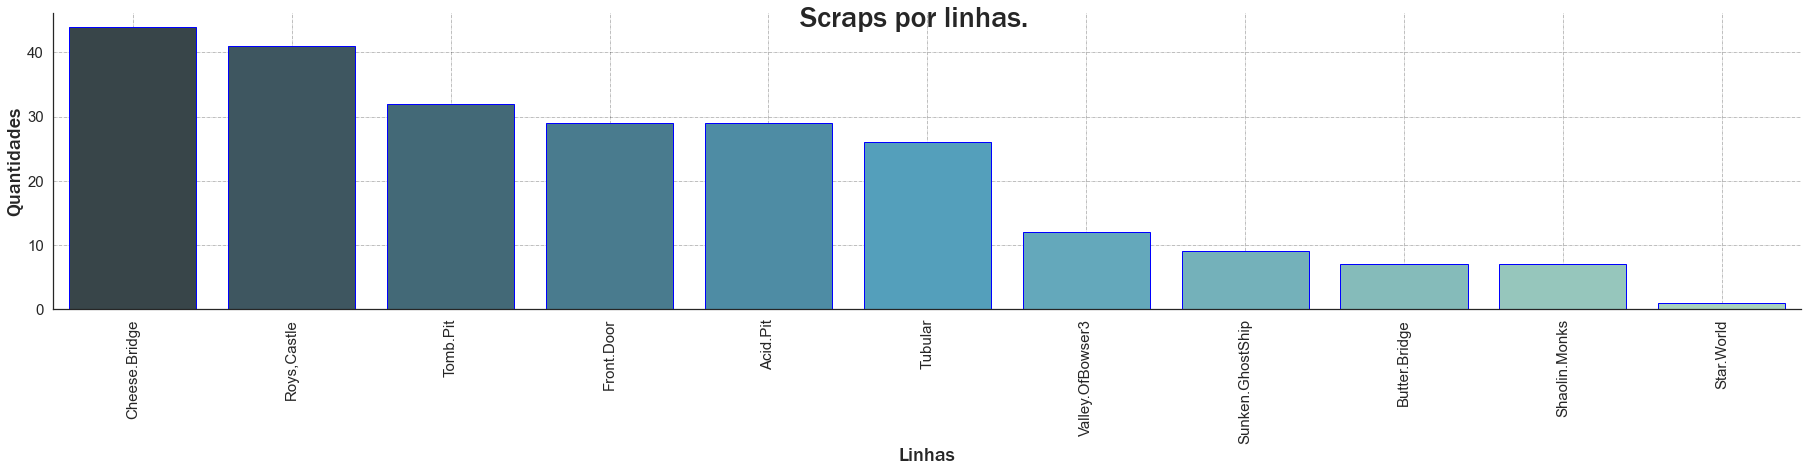

In [9]:
# Linha que gerou mais Scraps OK
dt = sns.catplot(x = "Linha", kind = "count", data = df_mes, palette = "GnBu_d",aspect = 5, edgecolor = "blue",order = df_mes["Linha"].value_counts().index) # Configurando plot
dt.set_xlabels("Linhas", fontname='Franklin Gothic Medium', size = 20) # Renomeando rotulos, tamanho e fontes.
dt.set_ylabels("Quantidades", fontname='Franklin Gothic Medium', size = 20) # Renomeando rotulos, tamanho e fontes.
dt.fig.suptitle("Scraps por linhas.", fontname='Franklin Gothic Medium', size = 30) # Adcionando titulo, rotulos, tamanho e fontes.
plt.xticks(rotation=90) # Rotacionando labels
plt.grid(visible = True, color ='black', linestyle = '-.', linewidth = 0.5, alpha = 0.5)
sns.set(style="white") # Cor no fundo do plot
plt.rcParams['xtick.labelsize'] = 15 # Alterando o tamanho da fonte no eixo
plt.rcParams['ytick.labelsize'] = 15 # Alterando o tamanho da fonte no eixo


### <span style="color:GreenYellow">*Analistas com maiores numeros de solicitações de Ap/Rp*</span> 📊

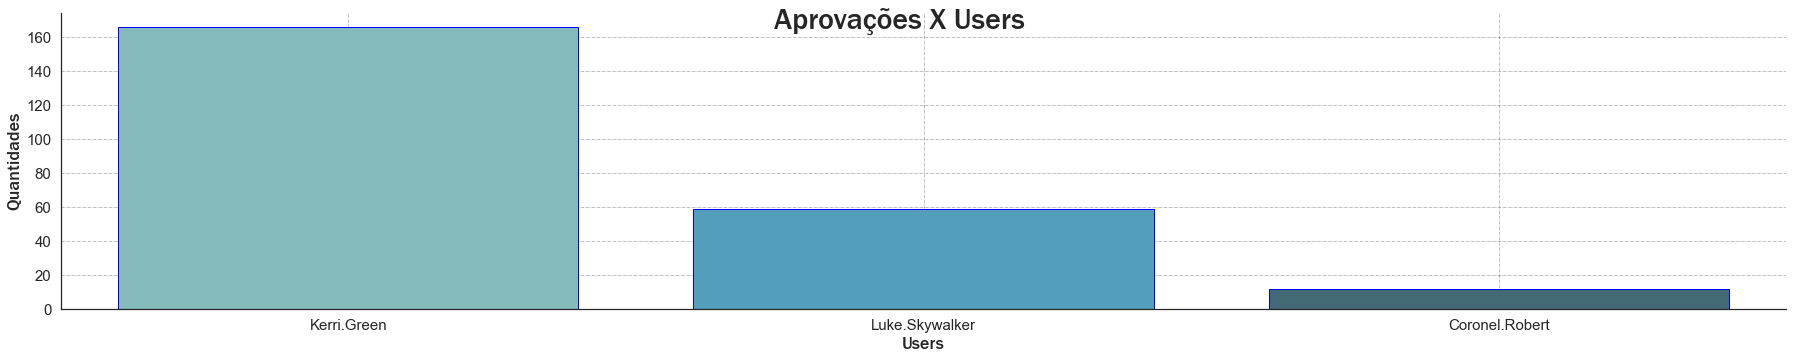

In [6]:
# Analista com maior numero de solicitações de Ap/Rp OK
user_aprov = df_mes["Usuário_Aprov/Reprov"].value_counts().to_frame().reset_index() #Escolhendo a coluna, contando valores e resetando o index.
user_aprov_plt = sns.catplot(x = "Usuário_Aprov/Reprov", kind = "count", data = df_mes , palette = "GnBu_d", edgecolor = "blue",aspect = 5 , order = df_mes["Usuário_Aprov/Reprov"].value_counts().index)
user_aprov_plt.fig.suptitle("Aprovações X Users", fontname = 'Franklin Gothic Medium', size = 30) # Adcionando titulo, rotulos, tamanho e fontes.
user_aprov_plt.set_xlabels("Users", fontname='Franklin Gothic Medium', size = 18) # Renomeando rotulos, tamanho e fontes.
user_aprov_plt.set_ylabels("Quantidades", fontname='Franklin Gothic Medium', size = 18) # Renomeando rotulos, tamanho e fontes.
plt.grid(visible = True, color ='black', linestyle = '-.', linewidth = 0.5, alpha = 0.5)
sns.set(style="white") # Cor no fundo do plot
plt.rcParams['xtick.labelsize'] = 15 # Alterando o tamanho da fonte no eixo
plt.rcParams['ytick.labelsize'] = 15 # Alterando o tamanho da fonte no eixo
plt.show(user_aprov_plt)


### <span style="color:GreenYellow">*Quantidades de sintomas apontados*</span> 📊

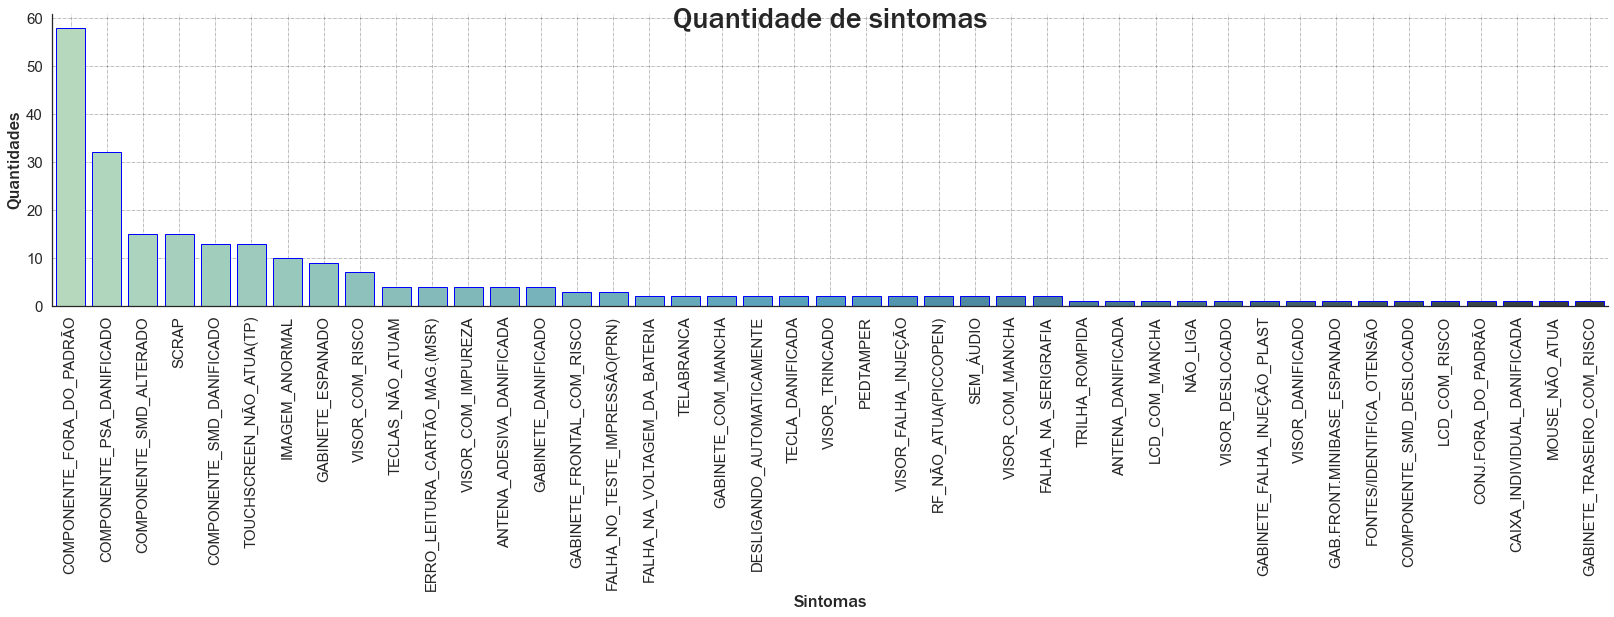

In [7]:
# Quantidade de Sintomas OK
dt = sns.catplot(x = "Sintoma", kind = "count", data = df_mes, edgecolor = "blue",palette = "GnBu_d",aspect = 5, order = df_mes["Sintoma"].value_counts().index) # Configurando plot
dt.set_xlabels("Sintomas", fontname='Franklin Gothic Medium', size = 18) # Renomeando rotulos, tamanho e fontes.
dt.set_ylabels("Quantidades", fontname='Franklin Gothic Medium', size = 18) # Renomeando rotulos, tamanho e fontes.
dt.fig.suptitle("Quantidade de sintomas", fontname='Franklin Gothic Medium', size = 30) # Adcionando titulo, rotulos, tamanho e fontes.
plt.xticks(rotation=90) # Rotacionando labels
plt.grid(visible = True, color ='black', linestyle = '-.', linewidth = 0.5, alpha = 0.5)
sns.set(style="white") # Cor no fundo do plot
plt.rcParams['xtick.labelsize'] = 14 # Alterando o tamanho da fonte no eixo
plt.rcParams['ytick.labelsize'] = 14 # Alterando o tamanho da fonte no eixo

### <span style="color:GreenYellow">*Datas com maiores indices de Scraps*</span> 📊

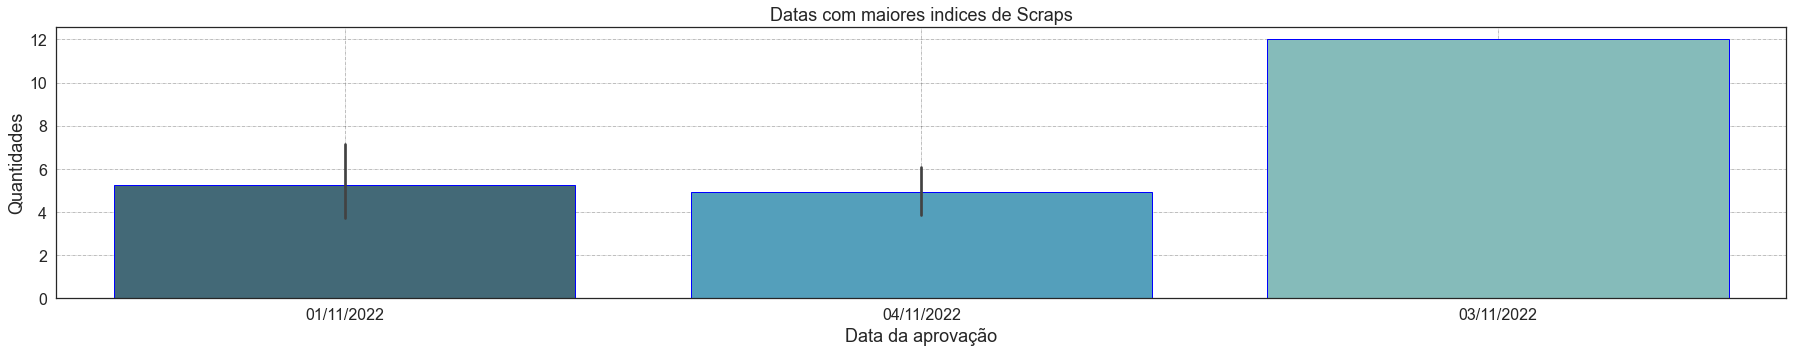

In [13]:
# Datas com maiors indices de Scraps OK
plt.figure(figsize = (31,5))
dt_data = sns.barplot(data = df_mes, x = "Data.Aprovação", y = "Qtd.", palette = "GnBu_d", edgecolor = "blue")
plt.xlabel("Data da aprovação", fontsize = 18)
plt.ylabel("Quantidades", fontsize = 18)
plt.title("Datas com maiores indices de Scraps", fontsize = 18)
sns.set(style = "white")
plt.grid(visible = True, color ='black', linestyle = '-.', linewidth = 0.5, alpha = 0.5)
plt.rcParams['xtick.labelsize'] = 16 # Alterando o tamanho da fonte no eixo
plt.rcParams['ytick.labelsize'] = 16 # Alterando o tamanho da fonte no eixo
plt.show()

### <span style="color:GreenYellow">*Usuarios com maiores quantidades de solicitações de Scraps*</span> 📊

In [44]:
# Usuarios com maiores quantidades de solicitações de Scraps, Passo 01. OK
sol_scrap = df_mes[["Usuário_Solicitante", "Status"]].value_counts().to_frame()

Nova_variavel = {
    "Usuário_Solicitante" : "Usuários_Solicitante",
    0 : "Total_Solicitado"
}
sol_scrap_new = sol_scrap.rename(columns = Nova_variavel)
sol_scrap_new = sol_scrap_new.head(10).reset_index()[["Usuário_Solicitante", "Total_Solicitado"]]

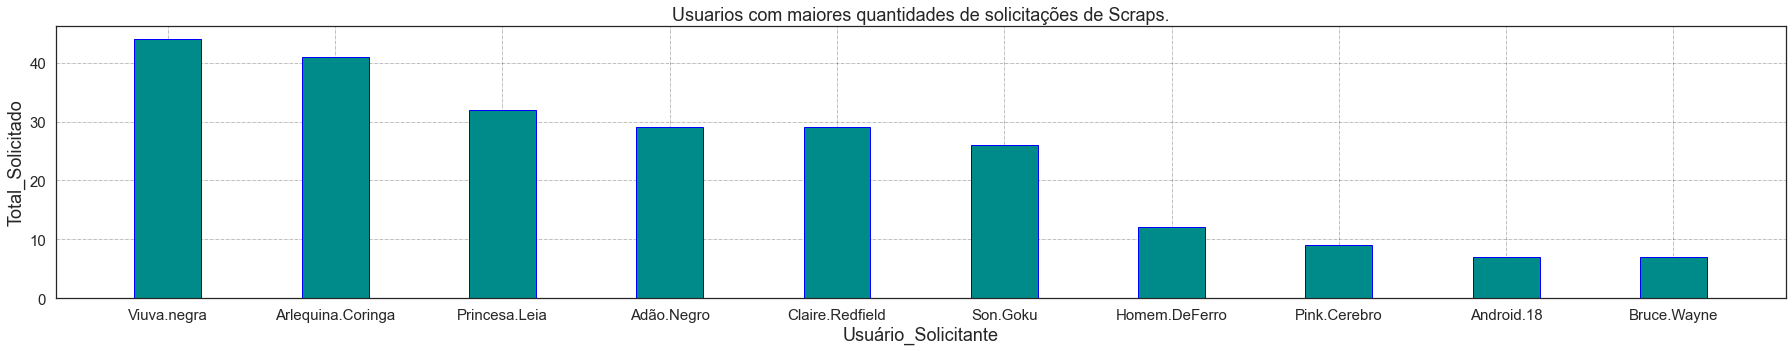

In [45]:
# Configurando a base, Passo 02, OK
plt.figure(figsize = (31,5))
x = sol_scrap_new["Usuário_Solicitante"]
y = sol_scrap_new["Total_Solicitado"]
plt.bar(x, y, color ='darkcyan', edgecolor = "blue", width = 0.4)
sns.set(style = "white")

# Titulos nos eixos
plt.xlabel("Usuário_Solicitante", fontsize = 18)
plt.ylabel("Total_Solicitado", fontsize = 18)
plt.title("Usuarios com maiores quantidades de solicitações de Scraps.", fontsize = 18)

#Grid no plot
plt.grid(visible = True, color ='black', linestyle = '-.', linewidth = 0.5, alpha = 0.5)

#Plotando o resultado
plt.rcParams['xtick.labelsize'] = 15 # Alterando o tamanho da fonte no eixo
plt.rcParams['ytick.labelsize'] = 15 # Alterando o tamanho da fonte no eixo
plt.show()

### <span style="color:GreenYellow">*Quantidade x Produto x Sintomas*</span> 📊

In [8]:
new = df_mes[['Produto', 'Sintoma']].value_counts().to_frame()

Nova_variavel = {
    "Produto" : "Produtos",
    "Sintoma" : "Sintomas",
    0 : "Total"
}
newc = new.rename(columns = Nova_variavel)
newc = newc.head(10).reset_index()
newc

,Produto,Sintoma,Total
0,2002090100I0853,TOUCHSCREEN_NÃO_ATUA(TP),8
1,501400000000038,IMAGEM_ANORMAL,6
2,200209010000002,TOUCHSCREEN_NÃO_ATUA(TP),5
3,2003180099N0756,COMPONENTE_PSA_DANIFICADO,4
4,2002090100I1003,VISOR_COM_RISCO,4
5,200212000000422,COMPONENTE_FORA_DO_PADRÃO,4
6,300100080000021,COMPONENTE_FORA_DO_PADRÃO,4
7,200212000000421,COMPONENTE_FORA_DO_PADRÃO,3
8,300100160000148,COMPONENTE_PSA_DANIFICADO,3
9,200212000000420,COMPONENTE_FORA_DO_PADRÃO,3


In [9]:
px.histogram(newc, x = "Sintoma", y = "Total", color = "Produto", title = "Quantidade x Produto x Sintonomas")

### <span style="color:GreenYellow">*Nuvem de palavras chaves citadas no universo de scrap, nesta base (Sempre tem uma cloud, fica lindo...)*</span> 📊☁️🔠

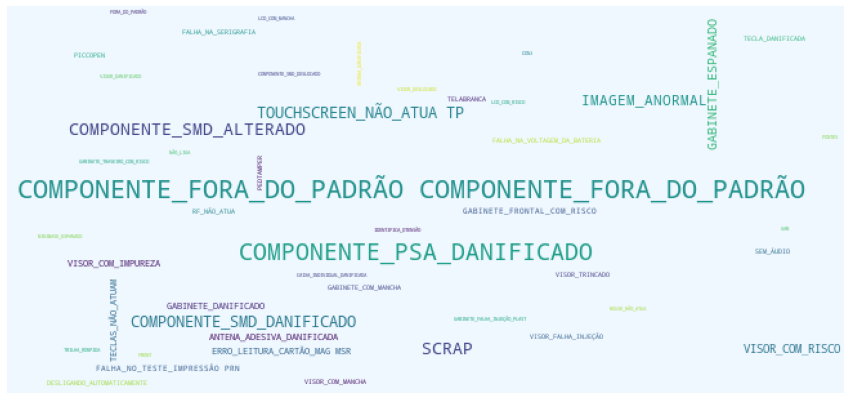

In [13]:
# Preparação de nuvens de palavras OK....
words = df_mes["Sintoma"]
all_words = ' '.join(w for w in words)
stopwords = set(STOPWORDS)

# Criado funções e plotando.
def plot_wordcloud(wc):
    fig, ax = plt.subplots(figsize = (15,10))
    ax.imshow(wc, interpolation = 'bilinear')
    ax.set_axis_off()
    plt.imshow(wc)

wc = WordCloud(stopwords = stopwords,
               background_color = 'AliceBlue',
               width = 650,
               max_font_size = 300,
               height = 300).generate(all_words)

plot_wordcloud(wc)